# Stochastic Simulation Assignment 2

# Todo list:

#### 2)
use some z/t/etc test

#### 3)

#### 4)
longtail dist should have same mean as other dists

In [1]:
# Imports

import simpy
import queue
import numpy.random as rand
import numpy as np
import matplotlib.pyplot as plt

from stochasticQueueing import *

## 2)

In [ ]:
def M_M_n_simulation(system_load, server_count, sim_duration, seed=42, queue_type='FIFO'):
    """
    Simulates an M/M/n queueing system.

    Parameters:
    - system_load: The load factor of the system (λ/μ).
    - server_count: The number of servers in the system.
    - sim_duration: The duration of the simulation.
    - seed: Seed for the random number generator to ensure reproducibility (default is 42).
    - queue_type: Type of queue (default is 'FIFO').

    Returns:
    - sim.results(): Results of the queueing simulation.
    """

    # Set arrival and service rates
    arrival_rate = server_count
    service_rate = 1 / system_load

    arrival_dist = lambda: rand.exponential(1 / arrival_rate)
    service_dist = lambda: rand.exponential(1 / service_rate)

    # Initialize and run the simulation
    sim = ServerQueueingSimulation(
        arrival_dist, service_dist, server_count, queue_type=queue_type, sim_duration=sim_duration, seed=seed
    )
    return sim.results()

## plots for $\rho$

1 9.445273799906728
2 5.818863542882133
4 11.506997412114469
8 8.66084096322714
16 1.994895546163684


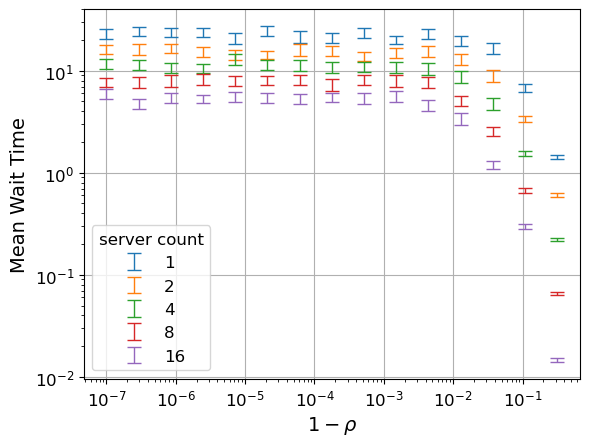

In [ ]:
# system load errorbar

server_counts = [1, 2, 4, 8, 16]
num_runs = 100
rand.seed(42)
system_loads = 1 - np.logspace(-0.5, -7, 15)
mean_wait_time = np.zeros_like(system_loads)
std_wait_time = np.zeros_like(system_loads)
for server_count in server_counts:
    for i, system_load in enumerate(system_loads):
        wait_times = np.zeros(num_runs)
        for j in range(num_runs):
            
            res = M_M_n_simulation(system_load, server_count, 1000, seed=rand.randint(0,2**31-1))
            wait_times[j] = res['Average Wait Time']

        mean_wait_time[i] = np.mean(wait_times)
        std_wait_time[i] = np.std(wait_times)
    # plt.plot(1 - system_loads, mean_wait_time, label=f'{server_count}')
    print(server_count, np.mean(wait_times[-1]))
    plt.errorbar(1 - system_loads, mean_wait_time, 1.96*std_wait_time/np.sqrt(num_runs), linestyle='', label=f'{server_count}', capsize=5, elinewidth=1)
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$1-\rho$', fontsize=14) 
plt.ylabel('Mean Wait Time', fontsize=14) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.legend(title='server count', title_fontsize=12, fontsize=12)


1 9.445273799906728
2 5.818863542882133
4 11.506997412114469


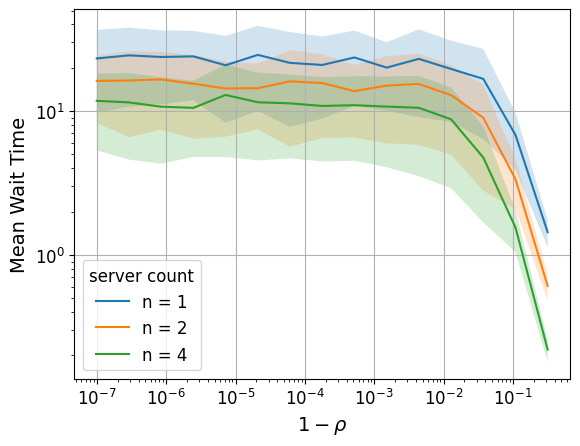

In [ ]:
# system load shadow plot

server_counts = [1, 2, 4]
num_runs = 100
rand.seed(42)
system_loads = 1 - np.logspace(-0.5, -7, 15)
mean_wait_time = np.zeros_like(system_loads)
std_wait_time = np.zeros_like(system_loads)
for server_count in server_counts:
    for i, system_load in enumerate(system_loads):
        wait_times = np.zeros(num_runs)
        for j in range(num_runs):
            
            res = M_M_n_simulation(system_load, server_count, 1000, seed=rand.randint(0,2**31-1))
            wait_times[j] = res['Average Wait Time']

        mean_wait_time[i] = np.mean(wait_times)
        std_wait_time[i] = np.std(wait_times)
    # plt.plot(1 - system_loads, mean_wait_time, label=f'{server_count}')
    print(server_count, np.mean(wait_times[-1]))
    x_values = system_loads
    plt.plot(1 - x_values, mean_wait_time, label=f'n = {server_count}')
    plt.fill_between(
        1 - x_values,
        mean_wait_time - std_wait_time,
        mean_wait_time + std_wait_time,
        alpha=0.2
    )
    # plt.errorbar(1 - system_loads, mean_wait_time, 1.96*std_wait_time/np.sqrt(num_runs), linestyle='', label=f'{server_count}', capsize=5, elinewidth=1)
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$1-\rho$', fontsize=14) 
plt.ylabel('Mean Wait Time', fontsize=14) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.legend(title='server count', title_fontsize=12, fontsize=12)
plt.savefig('plots/nserver_rho_shadow_plot')


## plots for duration

In [ ]:
# duration - Shadow plot 

server_counts = [1, 2, 4]
num_runs = 100
rand.seed(42)
system_load = 0.99
max_duration = np.logspace(1, 4, 10)
mean_wait_time = np.zeros_like(max_duration)
std_wait_time = np.zeros_like(max_duration)
for server_count in server_counts:
    for i, duration in enumerate(max_duration):
        wait_times = np.zeros(num_runs)
        for j in range(num_runs):
            
            res = M_M_n_simulation(system_load, server_count, duration, seed=rand.randint(0,2**31-1))
            wait_times[j] = res['Average Wait Time']

        mean_wait_time[i] = np.mean(wait_times)
        std_wait_time[i] = np.std(wait_times)
    print(max_duration, mean_wait_time)
    x_values = max_duration
    plt.plot(x_values, mean_wait_time, label=f'n = {server_count}')
    plt.fill_between(
        x_values,
        mean_wait_time - std_wait_time,
        mean_wait_time + std_wait_time,
        alpha=0.2
    )
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.xlabel(r'simulation duration', fontsize=14)
plt.ylabel('mean wait time', fontsize=14)
plt.legend(title='server count', title_fontsize=12, fontsize=12)
plt.savefig('plots/server_amount_shadow_plot')


In [ ]:
# duration - error bars

server_counts = [1, 2, 4]
num_runs = 1
rand.seed(42)
system_load = 0.99
max_duration = np.logspace(1, 7, 15)
mean_wait_time = np.zeros_like(max_duration)
std_wait_time = np.zeros_like(max_duration)
for server_count in server_counts:
    for i, duration in enumerate(max_duration):
        wait_times = np.zeros(num_runs)
        for j in range(num_runs):
            
            res = M_M_n_simulation(system_load, server_count, duration, seed=rand.randint(0,2**31-1))
            wait_times[j] = res['Average Wait Time']

        mean_wait_time[i] = np.mean(wait_times)
        std_wait_time[i] = np.std(wait_times)
    print(server_count, np.mean(wait_times[-1]))
    plt.errorbar(max_duration, mean_wait_time, 1.96*std_wait_time/np.sqrt(num_runs), linestyle='', label=f'{server_count}', capsize=5, elinewidth=1)
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'simulation duration')
plt.ylabel('mean wait time')
plt.legend(title='server count')

## 3)


In [ ]:
server_counts = [1]
num_runs = 100
rand.seed(42)
system_loads = 1 - np.logspace(-0.5, -7, 15)

for queue_type in ['FIFO', 'SJF']:
    for server_count in server_counts:
        mean_wait_time = np.zeros_like(system_loads)
        std_wait_time = np.zeros_like(system_loads)
        for i, system_load in enumerate(system_loads):
            wait_times = np.zeros(num_runs)
            for j in range(num_runs):
                res = M_M_n_simulation(
                    system_load, server_count, 1000, seed=rand.randint(0, 2**31 - 1), queue_type=queue_type
                )
                wait_times[j] = res['Average Wait Time']

            mean_wait_time[i] = np.mean(wait_times)
            std_wait_time[i] = np.std(wait_times)
        plt.errorbar(
            1 - system_loads,
            mean_wait_time,
            std_wait_time,
            linestyle='',
            label=f'{queue_type}',
            capsize=5,
            elinewidth=1,
        )

plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$1-\rho$', fontsize=14) 
plt.ylabel('Mean Wait Time', fontsize=14) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.legend(title='Queue Type', title_fontsize=12, fontsize=12)
plt.show()


In [ ]:
server_counts = [1]
num_runs = 100
rand.seed(42)
system_loads = 1 - np.logspace(-0.5, -7, 15)

for queue_type in ['FIFO', 'SJF']:
    for server_count in server_counts:
        mean_wait_time = np.zeros_like(system_loads)
        std_wait_time = np.zeros_like(system_loads)
        for i, system_load in enumerate(system_loads):
            wait_times = np.zeros(num_runs)
            for j in range(num_runs):
                res = M_M_n_simulation(
                    system_load, server_count, 1000, seed=rand.randint(0, 2**31 - 1), queue_type=queue_type
                )
                wait_times[j] = res['Average Wait Time']

            mean_wait_time[i] = np.mean(wait_times)
            std_wait_time[i] = np.std(wait_times)

        # Plot with shadow (fill_between)
        x_values = 1 - system_loads
        plt.plot(x_values, mean_wait_time, label=f'{queue_type}')
        plt.fill_between(
            x_values,
            mean_wait_time - std_wait_time,
            mean_wait_time + std_wait_time,
            alpha=0.2, label=f'STD of {queue_type}'
        )

plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$1-\rho$', fontsize=14) 
plt.ylabel('Mean Wait Time', fontsize=14) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.legend(title='Queue Type', title_fontsize=12, fontsize=12)

plt.savefig('plots/queue_types_shadow_plot')
plt.show()


## 4)
different service rates

In [ ]:

def M_X_n_simulation(system_load, server_count, sim_duration, seed=42, service_dist=None):
    """
    Simulates an M/X/n queueing system.

    Parameters:
    - system_load: The load factor of the system (λ/μ).
    - server_count: The number of servers in the system.
    - sim_duration: The duration of the simulation.
    - seed: Seed for the random number generator to ensure reproducibility (default is 42).
    - service_dist: Custom service distribution (default is exponential).

    Returns:
    - sim.results(): Results of the queueing simulation.
    """

    # Set arrival rate and job completion rate
    arrival_rate = server_count
    job_completion_rate = 1 / system_load
    
    arrival_dist = lambda: rand.exponential(1 / arrival_rate)

    # Use default exponential service distribution if none is provided
    if service_dist is None:
        service_dist = lambda: rand.exponential(1 / job_completion_rate)

    # Initialize and run the simulation
    sim = ServerQueueingSimulation(arrival_dist, service_dist, server_count, sim_duration=sim_duration, seed=seed)
    
    return sim.results()


# Running simulations for different service distributions
waiting_times = {'exponential': [], 'deterministic': [], 'hyperexponential': []}

for service_type in ['exponential', 'deterministic', 'hyperexponential']:
    for i in range(10):
        service_rate = 1 / 0.9
        seed = i  # Use a different seed for each iteration to ensure variability

        if service_type == 'exponential':
            service_dist = lambda: rand.exponential(1 / service_rate)

        elif service_type == 'deterministic':
            service_dist = lambda: 1 / service_rate

        elif service_type == 'hyperexponential':
            def service_dist():
                if rand.rand() < 0.5:
                    return rand.exponential(0.9)
                else:
                    return rand.exponential(1)

        else:
            raise ValueError("Unsupported service time distribution")
        
        result = M_X_n_simulation(0.9, 1, 100000, seed=seed, service_dist=service_dist)
        waiting_times[service_type].append(result['Average Wait Time'])

# Output all data points for each distribution
print("\nAll Data Points for Waiting Times:")
for service_type in waiting_times:
    print(f"{service_type.capitalize()} Waiting Times: {waiting_times[service_type]}")
    

# Print summary statistics for each distribution
means = {}
std_devs = {}
for service_type in waiting_times:
    mean_wait = np.mean(waiting_times[service_type])
    std_wait = np.std(waiting_times[service_type])
    means[service_type] = mean_wait
    std_devs[service_type] = std_wait
    print(f"{service_type.capitalize()} - Mean Waiting Time: {mean_wait:.4f}, Std Dev: {std_wait:.4f}")

# Create a scatter plot with error bars to visualize mean waiting times with their standard deviations
plt.figure(figsize=(10, 6))
colors = {'exponential': 'b', 'deterministic': 'g', 'hyperexponential': 'r'}
for service_type in waiting_times:
    x = np.arange(len(waiting_times[service_type]))
    y = waiting_times[service_type]
    plt.scatter(x, y, label=service_type.capitalize(), alpha=0.6, color=colors[service_type])
    plt.errorbar([np.mean(x)], [means[service_type]], yerr=[std_devs[service_type]], fmt='o', capsize=5, capthick=2, elinewidth=2, color=colors[service_type], markersize=8)

plt.xlabel('Simulation Index')
plt.ylabel('Waiting Time')
plt.title('Waiting Times for Different Service Rate Distributions')
plt.legend()
plt.grid(True)
plt.show()